In [79]:
#import sklearn as sk;
import pandas as pd;
import numpy as np; 


Label: Human_Development_Index

Countrys: 
"Name" 
"Region" 

Education: 

Event:

Heath:

Month:

Population:

Quality of Life:

In [80]:
# load the datasets 
dfCountry = pd.read_csv('./Tables/Country.csv')
dfEducation = pd.read_csv('./Tables/Education.csv')
dfEvent = pd.read_csv('./Tables/Event.csv')
dfFactTable = pd.read_csv('./Tables/Fact_Table.csv')
dfHealth = pd.read_csv('./Tables/Health.csv')
dfMonth = pd.read_csv('./Tables/Month.csv')
dfPopulation = pd.read_csv('./Tables/Population.csv')
dfQualityOfLife = pd.read_csv('./Tables/Quality_of_Life.csv')

dfPopulation = dfPopulation.drop(["PopulationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfEducation = dfEducation.drop(["EducationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfHealth = dfHealth.drop(["HealthKey", "SurrogateKey", "Country", "Year"], axis=1)
dfQualityOfLife = dfQualityOfLife.drop(["QualityofLifeKey", "SurrogateKey"], axis=1)

print(dfEducation.shape[0])
print(dfHealth.shape[0])
print(dfPopulation.shape[0])
print(dfQualityOfLife.shape[0])

canada = dfFactTable.loc[dfFactTable['CountryKey'] == 2]
unitedStates = dfFactTable.loc[dfFactTable['CountryKey'] == 8]
mexico = dfFactTable.loc[dfFactTable['CountryKey'] == 5]
mauritius = dfFactTable.loc[dfFactTable['CountryKey'] == 6]
liberia = dfFactTable.loc[dfFactTable['CountryKey'] == 4]
congo = dfFactTable.loc[dfFactTable['CountryKey'] == 3]
vietnam = dfFactTable.loc[dfFactTable['CountryKey'] == 9]
nepal = dfFactTable.loc[dfFactTable['CountryKey'] == 7]
bangladesh = dfFactTable.loc[dfFactTable['CountryKey'] == 1]

fixedFact = canada.append(unitedStates)
fixedFact = fixedFact.append(mexico)
fixedFact = fixedFact.append(mauritius)
fixedFact = fixedFact.append(liberia)
fixedFact = fixedFact.append(congo)
fixedFact = fixedFact.append(vietnam)
fixedFact = fixedFact.append(nepal)
fixedFact = fixedFact.append(bangladesh)
fixedFact = fixedFact.drop(["MonthKey","CountryKey", "EducationKey",  "QualityofLifeKey", "HealthKey", "EventKey", "PopulationKey", "Development_Index"], axis=1) 

df = pd.concat([dfQualityOfLife, dfHealth, dfPopulation, dfEducation, fixedFact], axis=1)

# print the shape of the dataframes 
print(f"Test Data shape: \n{dfCountry}\n")
print(f"Test Data shape: \n{dfEducation.shape}\n")
print(f"Test Data shape: \n{dfEvent.shape}\n")
print(f"Test Data shape: \n{dfFactTable.shape}\n")
print(f"Test Data shape: \n{dfHealth.shape}\n")
print(f"Test Data shape: \n{dfMonth.shape}\n")
print(f"Test Data shape: \n{dfPopulation.shape}\n")
print(f"Test Data shape: \n{dfQualityOfLife.shape}\n")
print("_____________________________________________\n")


    #scatterPlot


#print(f"Health Scatterplot: \n{scatterHealth}\n")




144
144
144
144
Test Data shape: 
   CountryKey  SurrogateKey             Name                     Region  \
0           1            20       Bangladesh                 South Asia   
1           2            35           Canada              North America   
2           3            43  Dem. Rep. Congo         Sub-Saharan Africa   
3           4           130          Liberia         Sub-Saharan Africa   
4           5           153           Mexico  Latin America & Caribbean   
5           6           166        Mauritius         Sub-Saharan Africa   
6           7           177            Nepal                 South Asia   
7           8           250    United States              North America   
8           9           256          Vietnam        East Asia & Pacific   

       Continent          Currency        Capital WB-2_Code Country_Code  \
0           Asia  Bangladeshi taka          Dhaka        BD          BGD   
1  North America   Canadian dollar         Ottawa        CA    

C:\Users\adamj\AppData\Local\Temp\ipykernel_21780\500533487.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixedFact = canada.append(unitedStates)
C:\Users\adamj\AppData\Local\Temp\ipykernel_21780\500533487.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixedFact = fixedFact.append(mexico)
C:\Users\adamj\AppData\Local\Temp\ipykernel_21780\500533487.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixedFact = fixedFact.append(mauritius)
C:\Users\adamj\AppData\Local\Temp\ipykernel_21780\500533487.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixedFact = fixedFact.append(liberia)
C:\Users\adamj\AppData\Local\Temp\ipy

for item in (df.columns.values):
     scatterPlot = df.plot.scatter(x=item, y='Human_Development_Index', c='orange')
     scatterPlot.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
     scatterPlot.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
     scatterPlot.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
     scatterPlot.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black
     scatterPlot.spines['left'].set_color('white')        # setting up Y-axis tick color to red
     scatterPlot.spines['top'].set_color('white')         #setting up above X-axis tick color to red

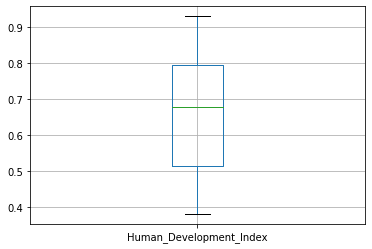

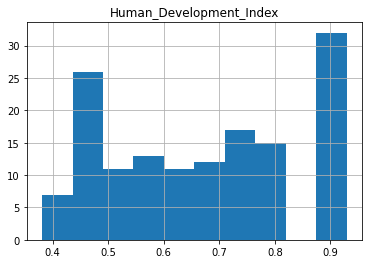

In [81]:
boxplot = df.boxplot(column = 'Human_Development_Index')
histogram = df.hist(column='Human_Development_Index')

In [96]:
#Finds the percentage of nulls within each column
percent_missing = df.isnull().sum() * 100 / len(df)

#Takes any columns that have a % of nulls greater than 1/3, and drops them from the dataframe
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print("\n\n Below are the percentages of nulls in each of our possible features:")
print("_____________________________________________________________________\n ")
print(missing_value_df)
df = df.drop(missing_value_df[percent_missing>33.33].index, axis=1)

df["Population,_total"] = df["Population,_total"].astype('float64')
df["Population,_male"] = df["Population,_male"].astype('float64')
df["Population,_female"] = df["Population,_female"].astype('float64')
df["Quality_of_Life"] = df["Quality_of_Life"].astype('float64')




 Below are the percentages of nulls in each of our possible features:
_____________________________________________________________________
 
                                                    percent_missing
Country                                                    0.000000
Age_dependency_ratio,_young                                0.000000
Age_dependency_ratio_(%_of_working-age_population)         0.000000
Urban_population_(%_of_total_population)                   0.000000
Rural_population_(%_of_total_population)                   0.000000
Population_growth_(annual_%)                               0.000000
Population,_female                                         0.000000
Population,_male                                           0.000000
Population,_total                                          0.000000
Quality_of_Life                                            0.000000
Human_Development_Index                                    0.000000
%_of_population_using_at_least_basic_dri

C:\Users\adamj\AppData\Local\Temp\ipykernel_21780\1009057893.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(missing_value_df[percent_missing>33.33].index, axis=1)


In [97]:
print(f"dataframe datatypes:\n")
print(df.dtypes)
print("\n")
print("_____________________________________________\n")


dataframe datatypes:

Country                                                            object
Year                                                               object
People_practicing_open_defecation(%_of_population)                float64
%_of_population_using_least_basic_sanitation_services             float64
%_of_population_using_at_least_basic_drinking_water_services      float64
Labor_force,_female(%_of_total_labor_force)                       float64
Unemployment,_male(%_of_male_labor_force)                         float64
Unemployment,_female(%_of_female_labor_force)                     float64
Unemployment,_total(%_of_total_labor_force)                       float64
Domestic_government_health_expenditure_per_capita(current US$)    float64
Immunization_HepB3(%_of_one-year-old_children)                    float64
Adults(ages_15+)_and_children(0-14_years)_living_with_HIV         float64
Out-of-pocket_expenditure(%_of _current_health_expenditure)       float64
Mortality_from_C